# Lab 1: Linux commands & Python

(Last update: 07/10/2024)

Name: Lê Hoàng Vũ

Student ID: 22120461

---

**Abstract**: This assignment tests your Python and Linux command skills. It also provides a general process for you to start a data project: Collect data $\to$ Preprocess data $\to$ Explore the meaning of data $\to$ Mine insights from data.


## 0. Instructions for doing and submitting assignment

**How to do your assignment**

You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

For optional coding parts, there will be:
```python
# YOUR CODE HERE (OPTION)
```

For markdown cell, there will be:
```markdown
YOUR ANSWER HERE
```

Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines.
Press `Ctrl + S` right after editing.

Keep it real: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

**How to submit your assignment**

When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Programming environment

- You will re-use the Linux environment setup in Lab 0 - WarmUp. Don't forget to start your coding environment (`conda activate min_ds-env`) before doing your assignment.
- Use Jupyter notebook or Jupyter lab, <font color=red>not Google Colab</font> (I can not grade you well on Google Colab) to edit your `*.ipynb` file.

In [3]:
import sys
sys.executable

'C:\\Users\\ACER\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe'

- Import necessary libraries

In [4]:
import datetime
# YOUR CODE HERE (OPTION)

import os
import datetime
from datetime import datetime
import requests

## 2. Data collection

- You are required to do the following tasks using Linux command:
    - Create a folder named `./data`
    - Collect data from the the links that were specified in `links.txt` and save to `./data` using `wget`
    - After collecting data, rename your data as `data_2019.csv`, `data_2018.csv` and `guidance.csv` using `mv`
    - List all the file contained in `./data` using `ls`

In [5]:
# # YOUR CODE HERE
!wsl mkdir data
!wsl wget -i links.txt -P data/

--2024-10-21 14:17:40--  https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Resolving datamillnorth.org (datamillnorth.org)... 104.26.5.58, 172.67.68.118, 104.26.4.58, ...
Connecting to datamillnorth.org (datamillnorth.org)|104.26.5.58|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv [following]
--2024-10-21 14:17:41--  https://datamillnorth.org/download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Reusing existing connection to datamillnorth.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 143972 (141K) [text/csv]
Saving to: ‘data/Traffic accidents_2019_Leeds.csv’

     0K .......... .......... .......... .......... .......... 35% 1.29M 0s
    50K .......... .......... .......... .......... .......... 71% 1.50M 0s
   100K .......... .....

In [6]:
# # YOUR CODE HERE
!wsl mv data/accidentsguidance.csv data/guidance.csv
!wsl mv data/"RTC 2018_Leeds.csv" data/data_2018.csv
!wsl mv data/"Traffic accidents_2019_Leeds.csv" data/data_2019.csv

!wsl ls data/

data_2018.csv
data_2019.csv
guidance.csv


## 3. Data exploring & Data preprocessing

### 3.0. Read data

- First, I suggest you check the downloaded data by yourself before handing on the code. What kind of the data that you have just downloaded? What is the meaning of each file?

YOUR ANSWER HERE: They are tabular data, which contain information about traffic accidents in UK from 2018 to 2019. Additionally, there is a file that explains the notions in 2 data files.

- After checking the data, design a function named `read_data` with the name of data file as parameter, which returns a dictionary. Each element of this dictionary follows:
    - Key: Name of the columns
    - Value: Lists which contains the data of the coresponding columns

In [7]:
def read_data(file_name):
    # Khởi tạo dictionary rỗng để lưu dữ liệu
    data = {}
    
    # Mở file với encoding utf-8-sig để đọc được tiếng Việt
    with open(file_name, 'r', encoding='utf-8-sig') as file:
        # Đọc dòng đầu tiên để lấy tên các cột
        headers = file.readline().rstrip().split(',')
        
        # Khởi tạo list rỗng cho mỗi cột
        for header in headers:
            data[header] = []
            
        # Đọc từng dòng dữ liệu
        for line in file:
            # Tách các giá trị trong dòng
            values = line.rstrip().split(',')
            # Thêm từng giá trị vào list tương ứng với cột của nó
            for header, value in zip(headers, values):
                data[header].append(value)
                
    return data

data_2018 = read_data('./data/data_2018.csv')
data_2019 = read_data('./data/data_2019.csv')

In [8]:
# TEST
assert set(data_2018.keys()) == set(['Accident Fields_Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])
assert set(data_2019.keys()) == set(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])

id_col_len = len(data_2018['Accident Fields_Reference Number'])
for col_name in data_2018:
    assert len(data_2018[col_name]) == id_col_len
    
id_col_len = len(data_2019['Reference Number'])
for col_name in data_2019:
    assert len(data_2019[col_name]) == id_col_len

### 3.1. The meaning of each column/row

- Please refer to `./data/guidance.csv` in order to get the meaning of each column
- Each row corresponds to an accident with a unique reference number
- Compute the number of rows and columns and assign to `num_rows_2018`, `num_cols_2018`, `num_rows_2019`, `num_cols_2019`

In [9]:
# YOUR CODE HERE
# Kiểm tra kích thước dữ liệu cho từng năm, lần lượt là Số lượng tai nạn và số lượng thuộc tính được ghi nhận

# Dữ liệu 2018
num_rows_2018=len(data_2018['Accident Fields_Reference Number'])
num_cols_2018=len(data_2018)                    

# Dữ liệu 2019
num_rows_2019=len(data_2019['Reference Number'])
num_cols_2019=len(data_2019)                                    

In [10]:
# TEST
assert (num_rows_2018, num_cols_2018, num_rows_2019, num_cols_2019) == (1995, 21, 1907, 18)

### 3.2. Duplicated columns

- Observe the data in 2018, you can see that columns `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` seem to contain quite similar data.

- Additionally, columns `Number of Vehicles` and `Vehicle Number` in `data_2018` and `data_2019` also look quite similar.

- In order to make sure of these hypothesises, you have to check these columns. Your mission is to design a function named `check_similarity` in order to check the similarity (in percentage) of 2 given columns.
- The percentage of similarity is computed by dividing the number of similar samples to total samples. `check_similarity` return a number illustrating the similarity of 2 columns.


In [11]:
def check_similarity(dataset, first_col, second_col):
    
    # Kiểm tra tồn tại của cột
    if (first_col not in dataset.keys()) or (second_col not in dataset.keys()):
        return 0
        
    # Kiểm tra độ dài 2 cột    
    if len(dataset[first_col]) != len(dataset[second_col]):
        return 0
        
    # Trường hợp so sánh cùng một cột
    if first_col == second_col:
        return 1
        
    # Tính tỉ lệ phần tử giống nhau
    length = len(dataset[first_col])
    matches = sum(1 for i in range(length) 
                 if dataset[first_col][i] == dataset[second_col][i])
    
    return matches/length

In [12]:
# TEST
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Vehicle Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Casualty Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.65213
assert round(check_similarity(data_2019, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.67541

- Therefore, column `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` contain the same data. We have to remove 2 of them.
- It could be noise for us to analyze 2 columns with more than 65% similarity, so I also decide to remove `Vehicle Number`.
- Since removing an element from a dictionary is a really hard task for beginner, I will help you on that.

In [13]:
del data_2018['Vehicle Fields_Reference Number'], data_2018['Casualty Fields_Reference Number']
del data_2019['Vehicle Number'], data_2018['Vehicle Number']

### 3.3. Data merging & Data checking

- In order for us to conveniently analyze the data, we should merge 2 data sets into 1.
- Compare the columns of 2 data sets, you can see that there are some unmergeable columns:
    - Column `Casualty Veh No` in `data_2018`: `data_2019` does not have one, so we have to remove this column from `data_2018`
    - Column `Accident Fields_Reference Number` in `data_2018` should be changed to `Reference Number`
- I will help you on these 2 tasks, then you will merge 2 data sets into `data_18_19`

In [14]:
# delete `Casualty Veh No` in data_2018
del data_2018['Casualty Veh No']

# rename
data_2018['Reference Number'] = data_2018.pop('Accident Fields_Reference Number')

In [15]:
# TEST
assert set(data_2018.keys()) == set(data_2019.keys())

In [16]:
# YOUR CODE HERE

# Gộp dữ liệu của 2 năm 2018 và 2019
data_18_19 = {}

# Với mỗi cột trong dữ liệu năm 2019 
for column in data_2019.keys():
    # Nối dữ liệu của cùng cột từ 2 năm
    data_18_19[column] = data_2018[column] + data_2019[column]

- After merging 2 data sets, you have to check whether there is any duplicated row based on the ID of each case. If there is, it should be removed from the dataset.

In [17]:
id_col = data_18_19['Reference Number']
num_duplicated = len(id_col) - len(set(id_col))

print(f'Duplicated rows: {"True" if num_duplicated > 0 else "False"}. Number of duplicated rows: {num_duplicated}')

Duplicated rows: True. Number of duplicated rows: 904


In [18]:
# YOUR CODE HERE

# Loại bỏ các dòng trùng lặp dựa trên tên
unique_records = {column: [] for column in data_18_19.keys()}
processed_names = set()

for record in zip(*data_18_19.values()):
    name = record[0]
    if name not in processed_names:
        processed_names.add(name)
        for col_index, column in enumerate(data_18_19.keys()):
            unique_records[column].append(record[col_index])

data_18_19 = unique_records

In [19]:
# TEST
assert set(data_18_19.keys()) == set(data_2018.keys())
assert len(set(data_18_19['Reference Number'])) == len(data_18_19['Reference Number'])
assert len(data_18_19['1st Road Class']) == 2998

- You also have to check if there is any missing data. For missing data, I suggest you to fill in since there are a lot of methods to handle it. But if the missing data for a column becomes too much (e.g. more than 50%), you should consider to remove the column out of the dataset.

- In this assignment, you will check missing data for each column. Result will be stored in a dictionary named `check_missing_data` which the key is column name and the value is `True` (some data is missing), `False` (no missing data).

In [20]:
# # YOUR CODE HERE
check_missing_data={}
for i in data_18_19.keys():
    missing_count = sum(1 for value in data_18_19[i] if value is None or value == '')
    if missing_count==0:
        check_missing_data[i]=False
    else:
        check_missing_data[i]=True
check_missing_data

{'Reference Number': False,
 'Grid Ref: Easting': False,
 'Grid Ref: Northing': False,
 'Number of Vehicles': False,
 'Accident Date': False,
 'Time (24hr)': False,
 '1st Road Class': False,
 '1st Road Class & No': False,
 'Road Surface': False,
 'Lighting Conditions': False,
 'Weather Conditions': False,
 'Local Authority': False,
 'Type of Vehicle': False,
 'Casualty Class': False,
 'Casualty Severity': False,
 'Sex of Casualty': False,
 'Age of Casualty': False}

In [21]:
# TEST
assert set(check_missing_data.keys()) == set(data_18_19.keys())
for col in check_missing_data.keys():
    assert check_missing_data[col] == False

### 3.4. Data conversion

- Obverse the datatype of each column

In [22]:
for col in data_18_19.keys():
    print(f'{col:25} {type(data_18_19[col][0])}')

Reference Number          <class 'str'>
Grid Ref: Easting         <class 'str'>
Grid Ref: Northing        <class 'str'>
Number of Vehicles        <class 'str'>
Accident Date             <class 'str'>
Time (24hr)               <class 'str'>
1st Road Class            <class 'str'>
1st Road Class & No       <class 'str'>
Road Surface              <class 'str'>
Lighting Conditions       <class 'str'>
Weather Conditions        <class 'str'>
Local Authority           <class 'str'>
Type of Vehicle           <class 'str'>
Casualty Class            <class 'str'>
Casualty Severity         <class 'str'>
Sex of Casualty           <class 'str'>
Age of Casualty           <class 'str'>


- Before moving to analyzing the dataset, the datatype of each column should be correct.
- Based on `./data/guidance.csv` and research on the Internet:
    - `Grid Ref` values are coordinate location in UK format $\to$ Datatype: int
    - `Number of Vehicles`: int
    - `Accident Date`: datetime
    - `Time (24hr)`: datetime
    - `Age of Casualty`: int
    - `1st Road Class`: str
    - Rest: str
    
- In reallife project, you have to convert all columns into their correct datatype before doing anything else. But in this assignment, you are just required to merge `Time (24hr)` and `Accident Date` into column `Full time` with the correct datatype (datetime). After merging, delete `Time (24hr)` and `Accident Date`.
    - The format of `Time (24hr)`: `hhmm`
    - The format of `Accident Date`: `dd/mm/yyyy`

In [23]:
# YOUR CODE HERE
from datetime import datetime

# Tạo cột thời gian đầy đủ bằng cách kết hợp ngày và giờ
datetime_values = []
record_count = len(data_18_19['Reference Number'])

for index in range(record_count):
    date_str = data_18_19['Accident Date'][index]
    time_str = data_18_19['Time (24hr)'][index]
    full_datetime = datetime.strptime(date_str + ' ' + time_str, '%d/%m/%Y %H%M')
    datetime_values.append(full_datetime)

# Thêm cột mới và xóa các cột cũ
data_18_19['Full time'] = datetime_values
del data_18_19['Time (24hr)'], data_18_19['Accident Date']

In [24]:
# TEST
assert set(data_18_19.keys()) == set(['Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Reference Number', 'Full time'])
assert type(data_18_19['Full time'][0]) == datetime

- Looks like values in the `Local Authority` column are all the same
- You need to count the number of distinct values of the `Local Authority` column
- If all values in the `Local Authority` are the same, delete that column

In [25]:
# YOUR CODE HERE
num_distinct_authority = len(set(data_18_19['Local Authority']))
if num_distinct_authority == 1:
    del data_18_19['Local Authority']

In [26]:
assert num_distinct_authority == 1
assert 'Local Authority' not in data_18_19.keys()

## 4. Questions proposing & answering

- In this section, we are going to propose 2 questions that can be answered by data. I will propose 1 question. The other one will be your task.
- Note that answering these questions should give us some insight or useful information about traffic in UK.

### 4.1. Question #1

- How many accidents are there in each day of a week (Mon $\to$ Sun) and in each hour of a day (0 $\to$ 23)?
- Meaning: Warn people to be careful when participating in traffic during those hours
- Answer:
    - Firstly, you will create a `matrix_` size $7\times24$ which each element indicates he number of accidents during a certain hour of a certain day of the week. E.g. `matrix_[1][7]` indicates the number of accidents from 7h00m to 7h59m of Tuesday
    - Then, you will fill in the matrix based on the column `Full time` that you have just created
    - Finally, I will help you visualize the result

In [28]:
nrow = 7   # Số hàng cho các ngày trong tuần
ncol = 24  # Số cột cho các giờ trong ngày
matrix_ = [[0 for _ in range(ncol)] for _ in range(nrow)]

for i in data_18_19['Full time']:
    row_index = i.weekday()  
    col_index = i.hour      
    matrix_[row_index][col_index] += 1

matrix_

[[9,
  2,
  4,
  4,
  5,
  4,
  6,
  22,
  25,
  24,
  20,
  12,
  17,
  20,
  35,
  54,
  38,
  42,
  24,
  17,
  16,
  6,
  8,
  4],
 [4,
  1,
  2,
  1,
  1,
  6,
  6,
  28,
  44,
  24,
  23,
  17,
  14,
  28,
  23,
  41,
  44,
  43,
  32,
  22,
  12,
  7,
  8,
  5],
 [3,
  2,
  0,
  4,
  2,
  4,
  6,
  33,
  46,
  21,
  18,
  20,
  17,
  19,
  27,
  38,
  41,
  52,
  34,
  28,
  17,
  15,
  13,
  7],
 [4,
  2,
  2,
  0,
  3,
  0,
  13,
  34,
  42,
  29,
  20,
  20,
  17,
  30,
  29,
  37,
  43,
  39,
  43,
  32,
  19,
  17,
  10,
  7],
 [4,
  1,
  0,
  0,
  2,
  1,
  13,
  26,
  39,
  23,
  23,
  18,
  21,
  31,
  35,
  42,
  51,
  42,
  32,
  29,
  21,
  20,
  14,
  18],
 [13,
  9,
  7,
  4,
  5,
  4,
  0,
  5,
  2,
  17,
  17,
  22,
  27,
  26,
  22,
  28,
  27,
  30,
  24,
  30,
  20,
  11,
  13,
  11],
 [14,
  6,
  8,
  1,
  7,
  6,
  2,
  4,
  6,
  14,
  10,
  21,
  24,
  19,
  12,
  30,
  20,
  19,
  27,
  18,
  10,
  14,
  9,
  4]]

Text(0.5, 1.0, 'Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

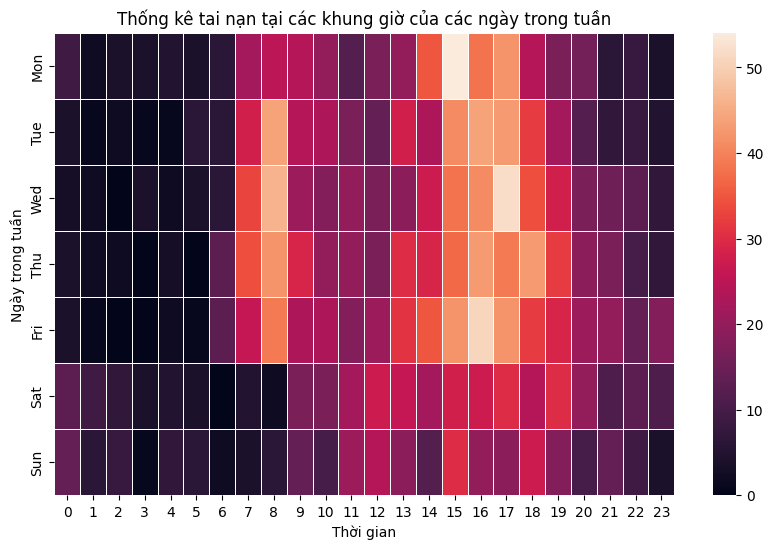

In [29]:
# visualize
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

### 4.2. Question #2

YOUR ANSWER HERE

- Question: Số lượng tai nạn theo phân loại đường
- Meaning: Cho thấy cần gia tăng giám sát, nâng cấp những loại đường nào thường xuyên hơn, từ đó giảm thiểu tai nạn

Đầu tiên lấy ra các header của dataframe <code><span style="color: #e83e8c;">data_18_19</span></code>.

In [48]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a DataFrame
data_18_19_df = pd.DataFrame(data_18_19)

data_18_19_df.columns

Index(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', '1st Road Class', '1st Road Class & No',
       'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle', 'Casualty Class', 'Casualty Severity',
       'Sex of Casualty', 'Age of Casualty', 'Full time'],
      dtype='object')

Tiếp theo ta sẽ nhóm các thông tin <code><span style="color: #e83e8c;">1st Road Class</span></code> và <code><span style="color: #e83e8c;">Number of Vehicles</span></code> vào một dataframe.

In [80]:
# Nhóm dữ liệu theo loại đường
grouped_by_road = data_18_19_df.groupby('1st Road Class')

# Đếm số vụ tai nạn trên mỗi loại đường
accidents_by_road = grouped_by_road.size().reset_index(name='Number of Accidents')

# Hiển thị kết quả
print(accidents_by_road)


  1st Road Class  Number of Accidents
0              1                  213
1              2                   74
2              3                  896
3              4                  122
4              5                    6
5              6                 1687


Sau đó từ file <code><span style="color: #e83e8c;">data/guidance.csv</span></code>, lấy ra ánh xạ loại đường. Tức là với loại đường được đánh số từ $1$ đến $6$, ta biết được những mã này ứng với loại đường nào.

In [81]:
def get_road_type_mapping(file_path='data/guidance.csv'):
    if not os.path.exists(file_path):
        print(f"Không tìm thấy file tại đường dẫn: {file_path}")
        return None
        
    print(f"Đang đọc file từ: {file_path}")
    
    try:
        # Đọc file CSV với encoding latin1 vì unicode đọc bị lỗi 
        df = pd.read_csv(file_path, header=None, encoding='latin1')

        print("Đọc file thành công")
        
        # Tạo ánh xạ loại đường
        road_type_mapping = {}

        # Tìm chỉ số của dòng bắt đầu và kết thúc cho phần "1st Road Class"
        start_index = df.index[df[0] == '1st Road Class'][0] + 1
        end_index = df.index[df[0] == 'Road Surface'][0]
        
        # Lặp qua từng dòng trong khoảng đã xác định
        for i in range(start_index, end_index):
            code = df.iloc[i, 0]
            desc = df.iloc[i, 1]
            
            # Kiểm tra nếu giá trị không phải NaN và không rỗng
            if pd.notna(code) and pd.notna(desc):
                road_type_mapping[str(code).strip()] = str(desc).strip()
        
        return road_type_mapping
            
    except Exception as e:
        print(f"Lỗi: {str(e)}")
        return None

mapping = get_road_type_mapping()

if mapping:
    print("\nÁnh xạ loại đường:")
    for code, desc in sorted(mapping.items()):
        print(f"{code}: {desc}")
else:
    print("\nKhông thể tạo được ánh xạ loại đường")


Đang đọc file từ: data/guidance.csv
Đọc file thành công

Ánh xạ loại đường:
1: Motorway
2: A(M)
3: A
4: B
5: C
6: Unclassified


C:\Users\ACER\AppData\Local\Temp\ipykernel_6212\3328308098.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=result_df, x='1st Road Class', y='Number of Vehicles', palette='husl')


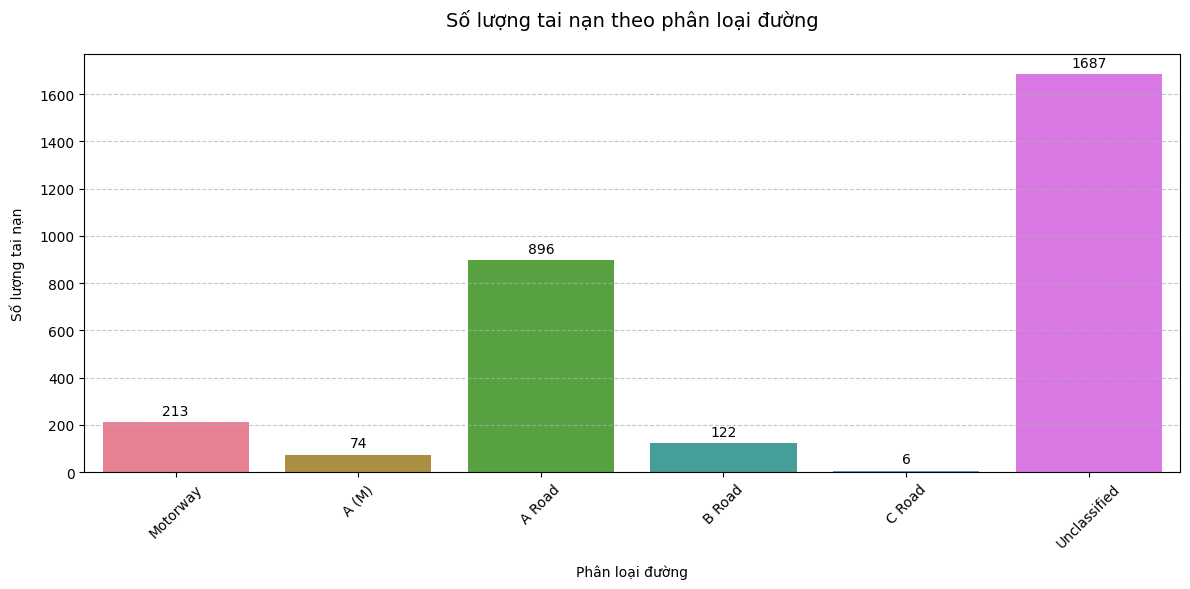

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Ánh xạ loại đường
road_types = {
    '1': 'Motorway',
    '2': 'A (M)',
    '3': 'A Road',
    '4': 'B Road',
    '5': 'C Road',
    '6': 'Unclassified'
}

# Sử dụng seaborn để vẽ biểu đồ cột
ax = sns.barplot(data=result_df, x='1st Road Class', y='Number of Vehicles', palette='husl')

# Thêm giá trị lên đầu cột
for i in ax.containers:
    ax.bar_label(i, padding=3)

# Thêm tiêu đề và nhãn
plt.title('Số lượng tai nạn theo phân loại đường', pad=20, size=14)
plt.xlabel('Phân loại đường', labelpad=10)
plt.ylabel('Số lượng tai nạn', labelpad=10)

# Thêm lưới 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Cập nhật nhãn trục x
current_labels = [road_types.get(str(x), f'Type {x}') for x in result_df['1st Road Class']]
plt.xticks(range(len(current_labels)), current_labels, rotation=45)

plt.tight_layout()
plt.show()

> Nhận xét: Từ biểu đồ, và dataframe lấy từ $3$ thuộc tính <code><span style="color: #e83e8c;">1st Road Class</span></code> và <code><span style="color: #e83e8c;">Number of Vehicles</span></code> lấy từ dataframe <code><span style="color: #e83e8c;">data_18_19</span></code>, ta rút ra được một số góc nhìn sau:
1. Loại đường đánh số $6$, hay loại Unclassified có số vụ tai nạn lớn nhất: $1687$. Trong thực tế em tìm hiểu được, số lượng đường "Unclassified" có thể chiếm một phần lớn trong hệ thống giao thông của một khu vực, đặc biệt là ở các vùng nông thôn hoặc ngoại ô, nơi các đường này chưa được phân loại hoặc nâng cấp thành các đường chính thức.
- Thường thì các đường này không được thiết kế chuẩn mực và có thể có điều kiện đường xá, ánh sáng hoặc biển báo không tốt. Ngoài ra, chúng có thể thường xuyên được sử dụng bởi nhiều loại phương tiện khác nhau, dẫn đến sự phức tạp và tăng khả năng xảy ra tai nạn.
- Do đó những cơ quan có chức năng nên quan tâm thêm việc bảo trì, nâng cấp các điều kiện tham gia giao thông ở những con đường này.

2. Loại đường đánh số $3$, hay loại $A$ có số vụ tai nạn cũng tương đối lớn hơn nhiều so với phần còn lại, với tổng cộng $896$ vụ tai nạn trong khoảng thời gian thống kê. Đây là một loại đường lớn, thường có nhiều làn xe và kết nối các khu vực quan trọng như thành phố lớn, thị trấn hoặc các cảng biển, sân bay. Loại này thường cũng là đường chính nhưng không nhất thiết phải có tiêu chuẩn cao như đường cao tốc. A Road thường có giao lộ, đèn giao thông và có thể có lưu lượng xe cao. 
- Dù được bảo trì và quản lý tốt hơn các loại đường về sau như $B$, $C$, Unclassified, sự lưu thông cao và tốc độ di chuyển nhanh hơn cũng làm tăng nguy cơ tai nạn. Đường lớn đồng nghĩa với việc tai nạn có thể nghiêm trọng hơn.
- Thế có thể thắc mắc tại sao đường motorway (cao tốc) và $A (M)$ lại ít vụ tai nạn hơn đáng kể? Có thể lý giải do những loại đường đó thường có tiêu chuẩn an toàn rất cao, với nhiều làn xe, rào chắn và hệ thống giao thông thông minh. Điều này giúp giảm thiểu tai nạn. Nhưng cũng có thể do điều kiện lái xe trên đường này là tốt hơn, ít giao cắt và không có người đi bộ hay phương tiện chậm hơn. Dù vậy, khi xảy ra tai nạn trên những đường này thì hậu quả thường nghiêm trọng hơn. 

3. Loại đường đánh số $5$, hay loại $C$ có số vụ tai nạn thấp nhất, cũng là con số thấp rất đáng kể so với những loại đường khác: 6 vụ tai nạn. Đường loại $C$ thường là những đường rất nhỏ và ít quan trọng hơn so với loại $B$ mà đa số chúng ta đi hằng ngày. Chúng thường kết nối các làng, khu dân cư hoặc những khu vực ít đông đúc. Hãy tưởng tượng đi đường ở quê, có rất ít phương tiện di chuyển cùng lúc nên nguy cơ va chạm rất nhỏ. Những con đường này cũng có thể có tốc độ tối đa thấp hơn nhiều, do đường xá gập ghềnh, khó đi, phải đi rất cẩn thận. Điều này phần nào dẫn đến ít tai nạn nghiêm trọng hơn.